In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [31]:
circuit1 = Circuit('Four double-pole High-Pass RLC Filter')

inductance = 2500@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)

2020-12-21 20:33:04,615 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


Capacitor C4

In [32]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

In [33]:
resonant_frequency = 1 / (2 * math.pi * math.sqrt(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 100.7 Hz
Factor of quality = 63.2


2020-12-21 20:33:11,826 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:33:11,827 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:33:11,841 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:33:11,843 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:33:11,856 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:33:11,858 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:33:11,869 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:33:11,871 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less


C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:46: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, phase, basex=10, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:46: Matplo

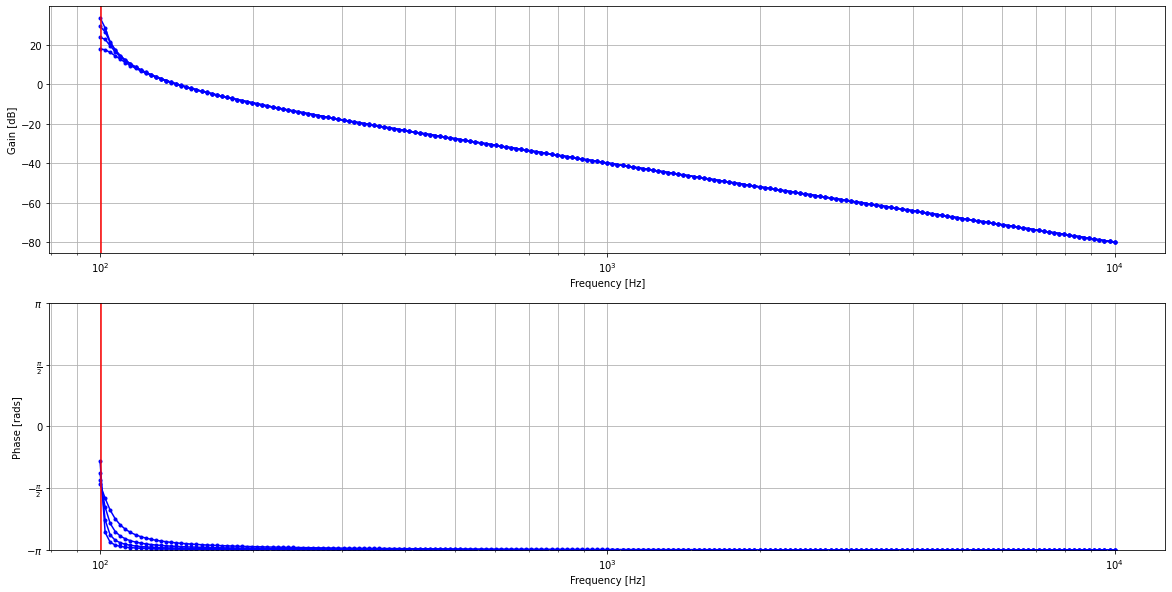

In [34]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

The maximum gain is about 15DB and it happens at 10^2Hz






Part B) 




Kinda ignore this: I originally had major issues with this code. I ran into a lot of cdef errors. I am not sure what the exact fix was. It just randomly worked after throwing 1000 fixes at it. I am still including this just in case other students also had this problem. I wish I could have given you an analysis but there is an issuse with PySpice on my computer. I have uninstalled and reinstalled Python, pip, anaconda, and PySpice. I have looked gone through the Python code with the listed issues but no online solution has worked. 

In [35]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 1@u_mH
capacitance = 25.3@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)

2020-12-21 20:38:04,540 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


Capacitor C4

In [36]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

In [37]:
resonant_frequency = 1 / (2 * math.pi * math.sqrt(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 1000.6 Hz
Factor of quality = 0.3


2020-12-21 20:38:11,205 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:38:11,206 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:38:11,229 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:38:11,230 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:38:11,246 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:38:11,247 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:38:11,263 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 20:38:11,265 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less


C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:46: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, phase, basex=10, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:46: Matplo

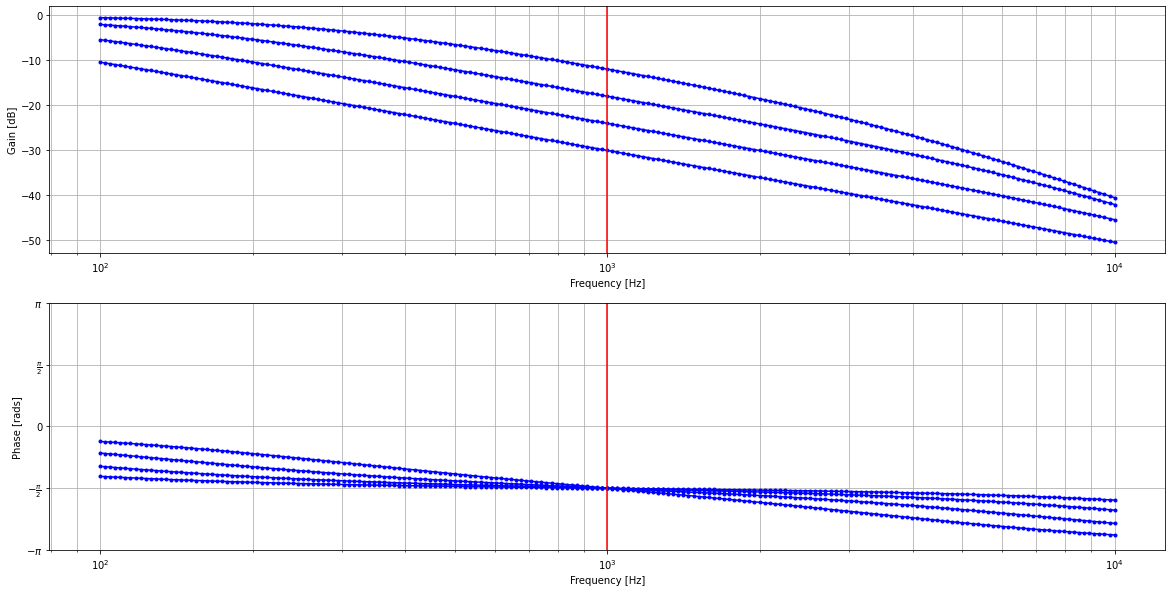

In [38]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

Part C)

In [44]:
circuit1 = Circuit('TwinT')

capacitance = 1@u_uF
R = 200@u_Ω

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, R)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'in', 2, R)
circuit1.C(2, 'out1', circuit1.gnd, 2*capacitance)
# Q = 2
R3 = circuit1.R(3, 'in', 3, R/2)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)

2020-12-21 20:54:31,482 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


Capacitor C3

In [45]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

2020-12-21 20:54:32,843 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Warning: singular matrix:  check nodes out5 and out5
2020-12-21 20:54:32,846 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Note: Starting true gmin stepping
2020-12-21 20:54:32,848 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Trying gmin =   1.0000E-03 Warning: singular matrix:  check nodes out5 and out5
2020-12-21 20:54:32,850 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Warning: Further gmin increment
2020-12-21 20:54:32,852 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Trying gmin =   5.6234E-03 Warning: singular matrix:  check nodes out5 and out5
2020-12-21 20:54:32,853 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Warning: Further gmin increment
2020-12-21 20:54:32,856 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Trying gmin =   8.6596E-03 Warning: singular matrix:  check nodes out5 and out5
2

NgSpiceCommandError: Command 'run' failed

In [46]:
resonant_frequency = 1 / (2 * math.pi * R * capacitance)
quality_factor = 1 / R3.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 795.8 Hz
Factor of quality = 0.3
